---
title: TRABAJO PRÁCTICO N° 2
subtitle: Histogramas, Kernels & Métodos no supervisados usando la EPH
author: Ricardo Javier Gutiérrez Vistín - Martín Gabriel Cargnel
date-format: "MMM, YYYY"
lang: es
execute:
  echo: true
  include: false
  fig-align: center
format:
  pdf:
    documentclass: scrartcl
    toc-depth: 2
    number-sections: true
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

Link al repositorio: https://github.com/mcargnel/Big-Data-UBA-Grupo-001/tree/main/TP1

{{< pagebreak >}}

# Creación de variables, histogramas, kernels y resumen de la base de datos final

In [3]:
# codigo anterior para limpiar la base

df_individual_t105 = pd.read_stata("/Users/mcargnel/Documents/mea/Big-Data-UBA-Grupo-001/TP2/data/Individual_t105.dta")
df_individual_t125 = pd.read_excel("/Users/mcargnel/Documents/mea/Big-Data-UBA-Grupo-001/TP2/data/usu_individual_T125.xlsx")

df_individual_t125.columns = df_individual_t125.columns.str.lower()
df_individual_t105.columns = df_individual_t105.columns.str.lower()
df_individual_t105_filt = df_individual_t105[df_individual_t105['region'] == 'Gran Buenos Aires']

df_individual_t125_filt = df_individual_t125[df_individual_t125['region'] == 1]

df_total_individual = pd.concat([df_individual_t105_filt, df_individual_t125_filt])

df_hogar_t105 = pd.read_stata("/Users/mcargnel/Documents/mea/Big-Data-UBA-Grupo-001/TP2/data/Hogar_t105.dta")
df_hogar_t125 = pd.read_excel("/Users/mcargnel/Documents/mea/Big-Data-UBA-Grupo-001/TP2/data/usu_hogar_T125.xlsx")

df_hogar_t125.columns = df_hogar_t125.columns.str.lower()
df_hogar_t105.columns = df_hogar_t105.columns.str.lower()
df_hogar_t105_filt = df_hogar_t105[df_hogar_t105['region'] == 'Gran Buenos Aires']

df_hogar_t125_filt = df_hogar_t125[df_hogar_t125['region'] == 1]

df_total_hogar = pd.concat([df_hogar_t105_filt, df_hogar_t125_filt])

df_total = pd.merge(df_total_individual, df_total_hogar[['codusu', 'nro_hogar', 'ix_tot']], on=['codusu', 'nro_hogar'], how='left')

In [4]:
variables_identificatorias = ['CODUSU', 'nro_hogar', 'componente']

variables_dadas = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']

variables_elegidas = ['PP04A', 'PP05B2_ANO', 'pp07c','pp07g_59','ITF','pp07j','PP11O', 'ix_tot']

total_variables = variables_identificatorias + variables_dadas + variables_elegidas
total_variables = [i.lower() for i in total_variables]

df_total = df_total[['ano4']+total_variables]

In [5]:
df_total['ch04'] = df_total['ch04'].replace({1: 'Varón', 2: 'Mujer'})

df_total['ch06'] = df_total['ch06'].replace({'Menos de 1 año': 0})
df_total['ch06'] = df_total['ch06'].astype(int)
df_total = df_total.loc[df_total['ch06'] >= 0]

df_total['ch07'] = df_total['ch07'].replace({1: 'Unido', 2: 'Casado', 3: 'Separado o divorciado',
                                             4: 'Viudo', 5:'Soltero'})

df_total['ch08'] = df_total['ch08'].replace({1.0: 'Obra social (incluye PAMI)',
                                             2.0: 'Mutual/Prepaga/Servicio de emergencia',
                                             3.0: 'Planes y seguros públicos',
                                             4.0: 'No paga ni le descuentan',
                                             9.0: 'Ns./Nr.',
                                             12.0: 'Obra social y mutual/prepaga/servicio de emergencia',
                                             123.0: 'Obra social y planes y seguros públicos'
                                             })

df_total['nivel_ed'] = df_total['nivel_ed'].replace({1: 'Primaria Incompleta (incluye educación especial)',
                                                    2: 'Primaria Completa',
                                                    3: 'Secundaria Incompleta',
                                                    4: 'Secundaria Completa',
                                                    5:'Superior Universitaria Incompleta',
                                                    6:'Superior Universitaria Completa',
                                                    7:'Sin instrucción'})

df_total['estado'] = df_total['estado'].replace({1: 'Ocupado',
                                                    2: 'Desocupado',
                                                    3: 'Inactivo',
                                                    4: 'Menor de 10 años',
                                                    0:'Entrevista individual no realizada (no respuesta al cuestion'
                                                    })

df_total['cat_inac'] = df_total['cat_inac'].replace({1: 'Jubilado/pensionado',
                                                    2: 'Rentista',
                                                    3: 'Estudiante',
                                                    4: 'Ama de casa',
                                                    5: 'Menor de 6 años',
                                                    6: 'Discapacitado',
                                                    7: 'Otros'
                                                    })

df_total['pp04a'] = df_total['pp04a'].replace({1.0: 'Estatal',
                                               '...estatal?': 'Estatal',
                                                    2.0: 'Privada?',
                                                    '...privada?':'Privada',
                                                    3.0: 'Otro',
                                                    '...de otro tipo? (especificar)': 'Otro'
                                                    })
df_total['pp07c'] = df_total['pp07c'].replace({1.0: 'Sí (incluye changa, trabajo transitorio, por tarea u obra, s',
                                               2.0: 'No (Incluye permanente, fijo, estable, de planta)',
                                               9.0: 'Ns./Nr.'
                                                })
df_total['pp07j'] = df_total['pp07j'].replace({1.0: 'Dia',
                                               2.0: 'Noche',
                                               3.0:'Otros',
                                               '...de día? (mañana/tarde)': 'Dia',
                                               '...de noche':'Noche',
                                               '...de otro tipo? (rotativo, día y noche, guardias con franco':'Otros'
                                                                                                        })

df_total['pp11o'] = df_total['pp11o'].replace({1.0: 'Despido/cierre',
                                               2.0: 'Por retiro voluntario del sector público',
                                               3.0:'Jubilación',
                                               4.0:'Fin del trabajo temporario/estacional',
                                               5.0:'Le pagaban poco/no le pagaban',
                                               6.0:'Malas relaciones laborales/malas condiciones de trabajo (ins',
                                               7:'Renuncia obligada/pactada',
                                               8.0: 'Otro',
                                               9:'Por razones personales'
                                                })

/var/folders/c6/f1ghz9qx1bbb4_2pszbddg800000gn/T/ipykernel_13979/3528535229.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_total['ch06'] = df_total['ch06'].replace({'Menos de 1 año': 0})


In [6]:
df_tabla_adulto = pd.read_excel('/Users/mcargnel/Documents/mea/Big-Data-UBA-Grupo-001/TP2/data/tabla_adulto_equiv.xlsx', skiprows=3)
df_tabla_adulto.dropna(inplace=True)
df_tabla_adulto['Edad'] = df_tabla_adulto['Edad'].str.replace(' años', '').replace('año', '')

In [7]:
rangos = [col for col in df_tabla_adulto['Edad'] if ' a ' in col]
tabla_rangos = df_tabla_adulto[df_tabla_adulto['Edad'].isin(rangos)]

rangos_expandidos = []

for _, row in tabla_rangos.iterrows():
    start, end = map(int, row["Edad"].split(" a "))
    for age in range(start, end + 1):
        rangos_expandidos.append({
            "Edad": age,
            "Mujeres": row["Mujeres"],
            "Varones": row["Varones"]
        })

last_row = tabla_rangos.iloc[-1]
for age in range(76, 101):
    rangos_expandidos.append({
        "Edad": age,
        "Mujeres": last_row["Mujeres"],
        "Varones": last_row["Varones"]
    })

rangos_expandidos_df = pd.DataFrame(rangos_expandidos)
df_tabla_adulto = pd.concat([df_tabla_adulto,rangos_expandidos_df])

df_tabla_adulto = df_tabla_adulto[~df_tabla_adulto['Edad'].isin(rangos +['más de 75'])]
df_tabla_adulto['Edad'] = df_tabla_adulto['Edad'].replace({'1año':1, 'Menor de 1 año': 0})
df_tabla_adulto['Edad'] = df_tabla_adulto['Edad'].astype(int)

df_tabla_adulto = df_tabla_adulto.melt(
    id_vars=['Edad'],
    value_vars=['Mujeres', 'Varones'],
    value_name='adulto_equiv',
    var_name='ch04'
)

df_tabla_adulto['ch04'] = df_tabla_adulto['ch04'].replace({'Mujeres': 'Mujer', 'Varones':'Varón'})
df_tabla_adulto.columns = ['ch06', 'ch04', 'adulto_equiv']

In [8]:
df_total = df_total.merge(df_tabla_adulto, on=['ch06', 'ch04'], how='left')

df_total["ad_equiv_hogar"] = (
    df_total.groupby(["codusu", "nro_hogar"])["adulto_equiv"]
      .transform("sum")
)

In [9]:
# respondieron itf

respondieron = df_total[df_total['itf'] != 0]

respondieron['ingreso_necesario'] = np.where(respondieron['ano4'] == 2005.0, respondieron['ad_equiv_hogar'] * 205.07,respondieron['ad_equiv_hogar'] * 365177)
respondieron['pobre'] = np.where(respondieron['itf'] <respondieron['ingreso_necesario'] , 1, 0)

# no respondieron itf
norespondieron = df_total[df_total['itf'] == 0]

/var/folders/c6/f1ghz9qx1bbb4_2pszbddg800000gn/T/ipykernel_13979/3441706892.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['ingreso_necesario'] = np.where(respondieron['ano4'] == 2005.0, respondieron['ad_equiv_hogar'] * 205.07,respondieron['ad_equiv_hogar'] * 365177)
/var/folders/c6/f1ghz9qx1bbb4_2pszbddg800000gn/T/ipykernel_13979/3441706892.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = np.where(respondieron['itf'] <respondieron['ingreso_necesario'] , 1, 0)


In [10]:
# Crear variable edad2 (edad al cuadrado)
respondieron["edad2"] = respondieron["ch06"] ** 2

/var/folders/c6/f1ghz9qx1bbb4_2pszbddg800000gn/T/ipykernel_13979/3748947925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron["edad2"] = respondieron["ch06"] ** 2


In [11]:
# Configuración del estilo gráfico
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.close('all')

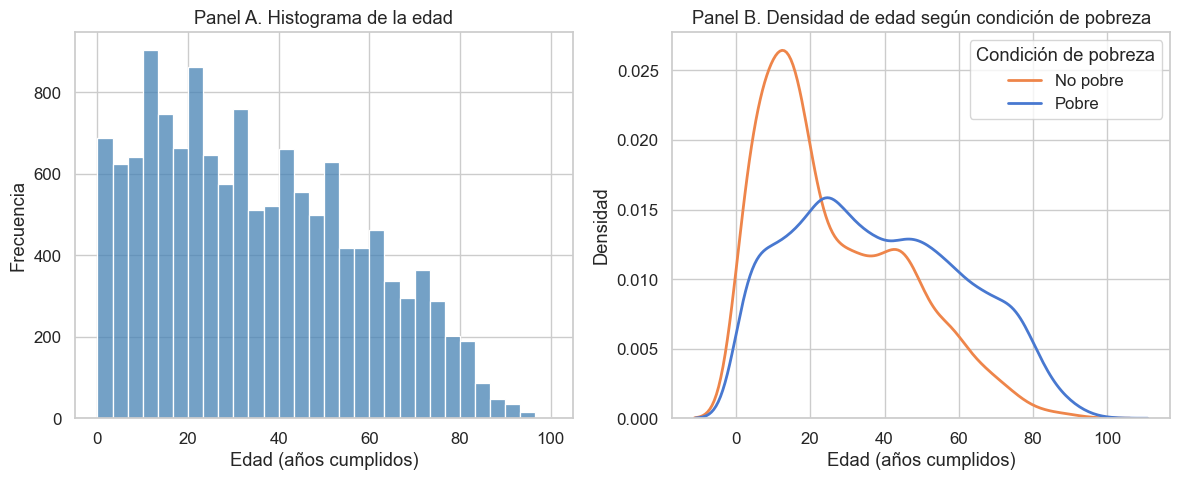

In [12]:
#| label: fig-heatmap-nulos
#| tbl-cap: Heatmap de datos nulos.
#| echo: false
#| include: true
#| fig-width: 2
#| fig-height: 1.5

# Crear figura con dos paneles
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Panel A
sns.histplot(data=respondieron, x="ch06", bins=30, color="steelblue", ax=axes[0])
axes[0].set_title("Panel A. Histograma de la edad")
axes[0].set_xlabel("Edad (años cumplidos)")
axes[0].set_ylabel("Frecuencia")

# Panel B
sns.kdeplot(
    data=respondieron,
    x="ch06",
    hue="pobre",
    fill=False,
    common_norm=False,
    linewidth=2,
    ax=axes[1]
)
axes[1].set_title("Panel B. Densidad de edad según condición de pobreza")
axes[1].set_xlabel("Edad (años cumplidos)")
axes[1].set_ylabel("Densidad")
axes[1].legend(title="Condición de pobreza", labels=["No pobre", "Pobre"], loc="upper right")

plt.tight_layout()
plt.show()


In [13]:
# Tabla A: Frecuencia general de edad (Panel A)
tabla_edad = (
    respondieron["ch06"]
    .value_counts(bins=10, sort=False)
    .rename_axis("Rango de edad")
    .reset_index(name="Frecuencia")
)
tabla_edad["Porcentaje (%)"] = (tabla_edad["Frecuencia"] / tabla_edad["Frecuencia"].sum() * 100).round(2)

# Tabla B: Frecuencia de edad según pobreza (Panel B)
tabla_edad_pobreza = (
    pd.cut(respondieron["ch06"], bins=10)
    .to_frame(name="Rango de edad")
    .join(respondieron["pobre"])
    .groupby(["Rango de edad", "pobre"])
    .size()
    .unstack(fill_value=0)
    .rename(columns={0: "No pobres", 1: "Pobres"})
)
tabla_edad_pobreza["Total"] = tabla_edad_pobreza.sum(axis=1)
tabla_edad_pobreza["% Pobres"] = (tabla_edad_pobreza["Pobres"] / tabla_edad_pobreza["Total"] * 100).round(2)

/var/folders/c6/f1ghz9qx1bbb4_2pszbddg800000gn/T/ipykernel_13979/3209921563.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Rango de edad", "pobre"])


In [14]:
print("Tabla A. Distribución general de edad")
display(tabla_edad.style.set_caption("Distribución general de edad (Panel A)"))

print("\nTabla B. Distribución de edad según condición de pobreza")
display(tabla_edad_pobreza.style.set_caption("Distribución de edad según condición de pobreza (Panel B)"))

Tabla A. Distribución general de edad


,Rango de edad,Frecuencia,Porcentaje (%)
0,"(-0.101, 10.0]",2183,15.990000
1,"(10.0, 20.0]",2308,16.900000
2,"(20.0, 30.0]",2057,15.070000
3,"(30.0, 40.0]",1772,12.980000
4,"(40.0, 50.0]",1710,12.520000
5,"(50.0, 60.0]",1429,10.470000
6,"(60.0, 70.0]",1059,7.760000
7,"(70.0, 80.0]",818,5.990000
8,"(80.0, 90.0]",281,2.060000
9,"(90.0, 100.0]",36,0.260000



Tabla B. Distribución de edad según condición de pobreza


pobre,No pobres,Pobres,Total,% Pobres
Rango de edad,,,,
"(-0.1, 10.0]",1255,928,2183,42.510000
"(10.0, 20.0]",1331,977,2308,42.330000
"(20.0, 30.0]",1558,499,2057,24.260000
"(30.0, 40.0]",1323,449,1772,25.340000
"(40.0, 50.0]",1252,458,1710,26.780000
"(50.0, 60.0]",1155,274,1429,19.170000
"(60.0, 70.0]",904,155,1059,14.640000
"(70.0, 80.0]",753,65,818,7.950000
"(80.0, 90.0]",263,18,281,6.410000


La distribución de edades muestra una concentración importante en los grupos jóvenes, principalmente entre los 10 y 30 años, que representan alrededor de un tercio de la población analizada, mientras que la frecuencia disminuye progresivamente a medida que aumenta la edad. En términos de pobreza, los datos indican que la incidencia es mayor en los grupos etarios más jóvenes con más del 40% de personas pobres entre 0 y 30 años y tiende a reducirse en los grupos de mayor edad, donde las tasas descienden por debajo del 15%. Esto sugiere que la vulnerabilidad económica afecta con mayor intensidad a la población joven, posiblemente debido a su menor estabilidad laboral y menor acumulación de capital humano.

In [15]:
# Creamos variable educación definida como la cantidad de años de educación

# Nombres en minúsculas para ambas bases
df_individual_t105.columns = df_individual_t105.columns.str.lower()
df_individual_t125.columns = df_individual_t125.columns.str.lower()

# Variables necesarias (según enunciado del TP)
educ_vars = ['codusu', 'nro_hogar', 'componente', 'ano4', 'ch12', 'ch13', 'ch14']

# Seleccionar solo las columnas educativas
educ_2005 = df_individual_t105[educ_vars].copy()
educ_2025 = df_individual_t125[educ_vars].copy()

# Verificación rápida
print("Dimensiones 2005:", educ_2005.shape)
print("Dimensiones 2025:", educ_2025.shape)

Dimensiones 2005: (47030, 7)
Dimensiones 2025: (45425, 7)


In [16]:
# Especificar la equivalencia de las variables
mapa_ch12 = {
    'Jardín/ Preescolar': 1, 'Jardin/ Preescolar': 1,
    'Primario': 2, 'EGB': 3, 'Secundario': 4, 'Polimodal': 5,
    'Terciario': 6, 'Universitario': 7,
    'Posgrado Univ.': 8, 'Educación especial (discapacitado)': 9
}

mapa_ch13 = {'Sí': 1, 'Si': 1, 'No': 2, 'Ns./Nr.': 9}
mapa_ch14 = {
    '00': 0, 'Ninguno': 0,
    '01': 1, 'Primero': 1,
    '02': 2, 'Segundo': 2,
    '03': 3, 'Tercero': 3,
    '04': 4, 'Cuarto': 4,
    '05': 5, 'Quinto': 5,
    '06': 6, 'Sexto': 6,
    '07': 7, 'Séptimo': 7,
    '08': 8, 'Octavo': 8,
    '09': 9, 'Noveno': 9
}

# Función para recodificar a numérico
def recodificar(df, var, mapa):
    df[var] = df[var].replace(mapa)
    df[var] = pd.to_numeric(df[var], errors='coerce').astype('Int64')
    return df

# Aplicar recodificación solo a las observaciones de la base del 2005
educ_2005 = recodificar(educ_2005, 'ch12', mapa_ch12)
educ_2005 = recodificar(educ_2005, 'ch13', mapa_ch13)
educ_2005 = recodificar(educ_2005, 'ch14', mapa_ch14)

# Verificación rápida
educ_2005[['ch12', 'ch13', 'ch14']].head()

/var/folders/c6/f1ghz9qx1bbb4_2pszbddg800000gn/T/ipykernel_13979/1925455067.py:25: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[var] = df[var].replace(mapa)
/var/folders/c6/f1ghz9qx1bbb4_2pszbddg800000gn/T/ipykernel_13979/1925455067.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[var] = df[var].replace(mapa)
/var/folders/c6/f1ghz9qx1bbb4_2pszbddg800000gn/T/ipykernel_13979/1925455067.py:25: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be

,ch12,ch13,ch14
0,4,2,2
1,4,1,<NA>
2,6,1,<NA>
3,0,0,<NA>
4,2,1,<NA>


In [17]:
# Concatenar verticalmente ambas bases
educ_total = pd.concat([educ_2005, educ_2025], ignore_index=True)

# Eliminar filas donde CH12 o CH13 sean 0 o 99
educ_total = educ_total[
    ~((educ_total['ch12'].isin([0, 99])) |
      (educ_total['ch13'].isin([0, 9]))  |
      (educ_total['ch13'].isin([0, 99])))
].reset_index(drop=True)

# Verificación
print("Dimensiones después del filtrado:", educ_total.shape)
educ_total[['ch12', 'ch13', 'ch14']].head(10)

Dimensiones después del filtrado: (87331, 7)


,ch12,ch13,ch14
0,4,2,2.0
1,4,1,<NA>
2,6,1,<NA>
3,2,1,<NA>
4,4,1,<NA>
5,4,1,<NA>
6,4,1,<NA>
7,4,2,5.0
8,7,2,0.0
9,7,1,<NA>


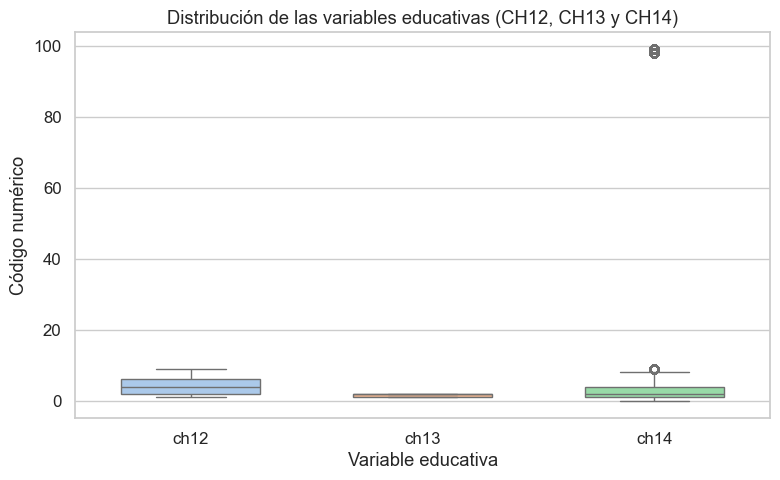

In [18]:
# Boxplot de las variables

# Configuración general del estilo
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

# Seleccionar las variables educativas
vars_educ = ['ch12', 'ch13', 'ch14']

# Crear el boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=educ_total[vars_educ], orient='v', width=0.6)

# Etiquetas y título
plt.title("Distribución de las variables educativas (CH12, CH13 y CH14)")
plt.ylabel("Código numérico")
plt.xlabel("Variable educativa")

plt.tight_layout()
plt.show()

In [19]:
# Tratamiento de outliers

# Copia de seguridad de la base original
educ_total_limpia = educ_total.copy()

# Variables a limpiar
vars_educ = ['ch12', 'ch13', 'ch14']

for var in vars_educ:
    # Calcular los cuartiles e IQR
    Q1 = educ_total_limpia[var].quantile(0.25)
    Q3 = educ_total_limpia[var].quantile(0.75)
    IQR = Q3 - Q1
# Límites inferior y superior
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

# Reemplazar outliers por NaN
outliers = (educ_total_limpia[var] < lim_inf) | (educ_total_limpia[var] > lim_sup)
educ_total_limpia.loc[outliers, var] = np.nan

# Mostrar resumen
print(f"{var}: {outliers.sum()} valores atípicos reemplazados. Rango aceptado [{lim_inf:.2f}, {lim_sup:.2f}]")

# Verificación rápida
educ_total_limpia[vars_educ].describe()

ch14: 1144 valores atípicos reemplazados. Rango aceptado [-3.50, 8.50]


,ch12,ch13,ch14
count,85949.0,87331.0,45959.0
mean,4.059419,1.539362,2.621902
std,1.788594,0.498451,1.961002
min,1.0,1.0,0.0
25%,2.0,1.0,1.0
50%,4.0,2.0,2.0
75%,6.0,2.0,4.0
max,9.0,2.0,8.0


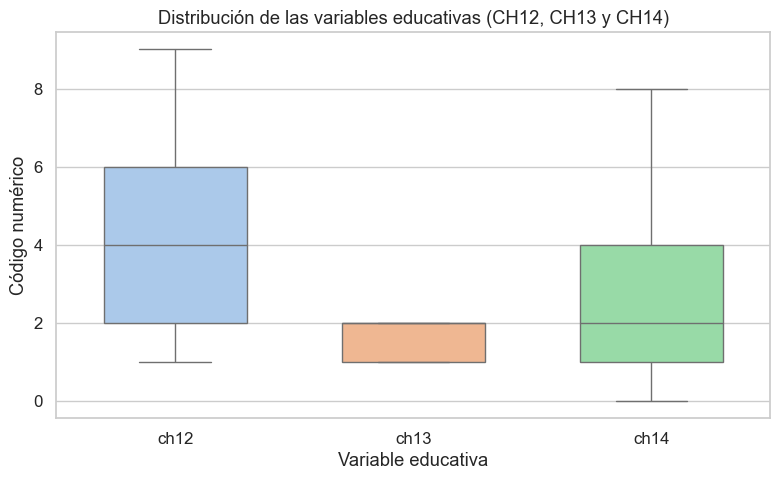

In [20]:
# Configuración general del estilo
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

# Seleccionar las variables educativas
vars_educ = ['ch12', 'ch13', 'ch14']

# Crear el boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=educ_total_limpia[vars_educ], orient='v', width=0.6)

# Etiquetas y título
plt.title("Distribución de las variables educativas (CH12, CH13 y CH14)")
plt.ylabel("Código numérico")
plt.xlabel("Variable educativa")

plt.tight_layout()
plt.show()

In [21]:
# Unión de bases
respondieron = respondieron.merge(
    educ_total_limpia,
    on=['codusu', 'nro_hogar', 'componente', 'ano4'],  # claves comunes
    how='left'  # conserva todas las observaciones de 'respondieron'
)

# Verificar resultado
print("Dimensiones de la base unificada:", respondieron.shape)
respondieron[['ch12', 'ch13', 'ch14']].head(10)


Dimensiones de la base unificada: (13653, 28)


,ch12,ch13,ch14
0,4,2,2.0
1,4,1,<NA>
2,6,1,<NA>
3,<NA>,<NA>,<NA>
4,2,1,<NA>
5,4,1,<NA>
6,4,1,<NA>
7,4,1,<NA>
8,4,2,5.0
9,7,2,0.0


In [22]:
# Definición de equivalencias entre nivel educativo y años de escolaridad
nivel_a_anios = {
    1: 0,   # Jardín / Preescolar
    2: 6,    # Primario
    3: 9,    # EGB
    4: 12,   # Secundario
    5: 13,   # Polimodal
    6: 15,   # Terciario
    7: 17,   # Universitario
    8: 21,  # Posgrado
    9: 6    # Educación especial
}

In [23]:
# Asignación de años de educación a quienes completaron su nivel

respondieron["educ"] = np.where(
    respondieron["ch13"].fillna(0) == 1,  # reemplaza NAs por 0 (no finalizado)
    respondieron["ch12"].map(nivel_a_anios),
    np.nan
)

In [24]:
# Cálculo de años para quienes no finalizaron su nivel
respondieron.loc[respondieron["ch13"] == 2, "educ"] = (
    respondieron["ch12"] - 1
).map(nivel_a_anios) + respondieron["ch14"]

/var/folders/c6/f1ghz9qx1bbb4_2pszbddg800000gn/T/ipykernel_13979/2695309350.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<FloatingArray>
[11.0, 14.0, 15.0, 16.0, 10.0, 19.0, 15.0, 11.0, 17.0, 13.0,
 ...
  2.0, 10.0, 15.0, 12.0, 11.0, 10.0,  4.0,  2.0, 13.0, 18.0]
Length: 6920, dtype: Float64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  respondieron.loc[respondieron["ch13"] == 2, "educ"] = (


In [25]:
# Limpieza y validación de la variable 'educ'
respondieron["educ"] = pd.to_numeric(respondieron["educ"], errors="coerce")
respondieron.loc[~respondieron["educ"].between(0, 25), "educ"] = np.nan

In [26]:
#| label: tab-descrip-educ
#| tab-cap: Estadistica descriptiva de la variable 'educ' definida como años de educación.
#| echo: false
#| include: true
#| fig-width: 2
#| fig-height: 1.5

# Estadísticas descriptivas de la variable 'educ' = cantidad de años de educación
stats = respondieron["educ"].describe(percentiles=[0.5]).round(2)
tabla_educ = pd.DataFrame({
    "Estadístico": ["Promedio", "Desviación estándar", "Mínimo", "Mediana (p50)", "Máximo"],
    "Valor": [stats["mean"], stats["std"], stats["min"], stats["50%"], stats["max"]]
})

display(tabla_educ)

,Estadístico,Valor
0,Promedio,10.79
1,Desviación estándar,4.56
2,Mínimo,0.00
3,Mediana (p50),12.00
4,Máximo,24.00


Tratamiento de outliers (IQR):
Q1: 810 | Q3: 690,000 | IQR: 689,190
Límite inferior: -1,032,975 | Límite superior: 1,723,785
Observaciones afectadas: 1590


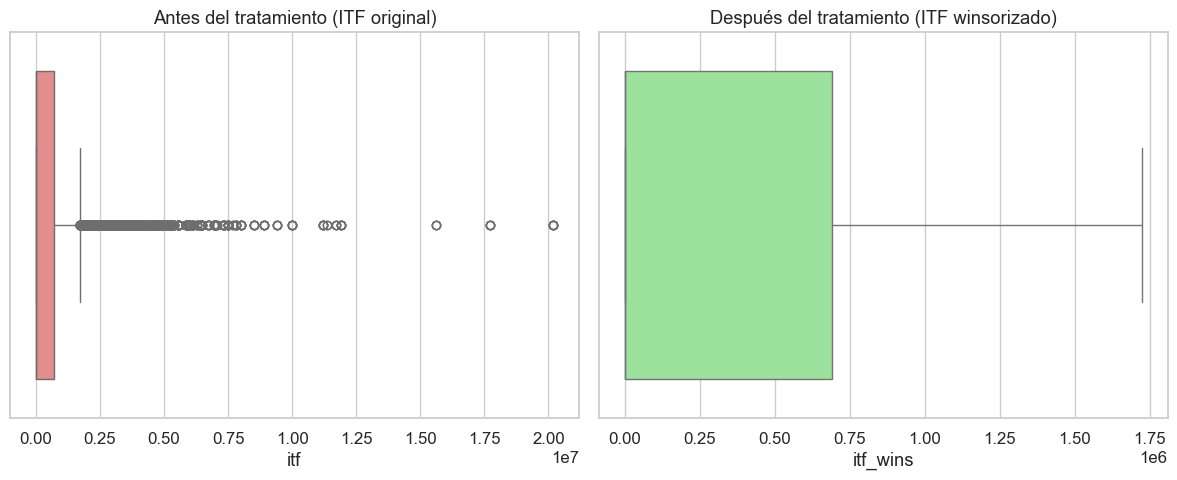

In [27]:
# Ingresos familiares totales

# Calcular cuartiles e IQR
Q1 = respondieron["itf"].quantile(0.25)
Q3 = respondieron["itf"].quantile(0.75)
IQR = Q3 - Q1

# Definir límites inferior y superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Winsorización: reemplazar valores fuera de rango
respondieron["itf_wins"] = respondieron["itf"].clip(lower=limite_inferior, upper=limite_superior)

# Verificación de resultados
print("Tratamiento de outliers (IQR):")
print(f"Q1: {Q1:,.0f} | Q3: {Q3:,.0f} | IQR: {IQR:,.0f}")
print(f"Límite inferior: {limite_inferior:,.0f} | Límite superior: {limite_superior:,.0f}")
print(f"Observaciones afectadas: {(respondieron['itf'] != respondieron['itf_wins']).sum()}")

# Boxplots comparativos antes y después
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x=respondieron["itf"], ax=ax[0], color="lightcoral")
ax[0].set_title("Antes del tratamiento (ITF original)")
sns.boxplot(x=respondieron["itf_wins"], ax=ax[1], color="lightgreen")
ax[1].set_title("Después del tratamiento (ITF winsorizado)")
plt.tight_layout()
plt.show()

In [28]:
# Definir valores base de la Canasta Básica Total
CBT_2005 = 205.07
CBT_2025 = 365177

# Calcular factor de actualización
factor_actualizacion = CBT_2025 / CBT_2005  # ≈ 1781.69

# Convertir ingresos familiares de 2005 a pesos 2025
respondieron["ingreso_total_familiar"] = np.where(
    respondieron["ano4"] == 2005,
    respondieron["itf_wins"] * factor_actualizacion,
    respondieron["itf_wins"]
)

# Calcular ingreso necesario homogéneo (en precios 2025)
respondieron["ingreso_necesario"] = respondieron["ad_equiv_hogar"] * CBT_2025

# Clasificar condición de pobreza homogénea
respondieron["pobre"] = np.where(
    respondieron["ingreso_total_familiar"] < respondieron["ingreso_necesario"], 1, 0
)

# Redondear para mejor lectura
respondieron["ingreso_total_familiar"] = respondieron["ingreso_total_familiar"].round(0)
respondieron["ingreso_necesario"] = respondieron["ingreso_necesario"].round(0)

# Verificación de consistencia
print("\nVariables monetarias actualizadas:")
print(respondieron[["ano4", "itf_wins", "ingreso_total_familiar", "ingreso_necesario", "pobre"]].head(100000))



Variables monetarias actualizadas:
         ano4   itf_wins  ingreso_total_familiar  ingreso_necesario  pobre
0      2005.0      583.0               1038173.0           303097.0      0
1      2005.0      450.0                801334.0           777827.0      0
2      2005.0      450.0                801334.0           777827.0      0
3      2005.0      450.0                801334.0           777827.0      0
4      2005.0      855.0               1522535.0           244669.0      0
...       ...        ...                     ...                ...    ...
13648  2025.0  1064000.0               1064000.0          1168566.0      1
13649  2025.0  1064000.0               1064000.0          1168566.0      1
13650  2025.0   860000.0                860000.0           843559.0      0
13651  2025.0   860000.0                860000.0           843559.0      0
13652  2025.0   860000.0                860000.0           843559.0      0

[13653 rows x 5 columns]


In [29]:
# Calcular IQR
Q1 = respondieron["ingreso_necesario"].quantile(0.25)
Q3 = respondieron["ingreso_necesario"].quantile(0.75)
IQR = Q3 - Q1

# Definir límites inferior y superior
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

print(f"Límite inferior: {lim_inf:,.0f} | Límite superior: {lim_sup:,.0f}")

# Crear variable winsorizada (recortando valores extremos)
respondieron["ingreso_necesario_wins"] = respondieron["ingreso_necesario"].clip(lim_inf, lim_sup)

# Verificar resumen comparativo
respondieron[["ingreso_necesario", "ingreso_necesario_wins"]].describe().round(2)

Límite inferior: -292,143 | Límite superior: 2,541,633


,ingreso_necesario,ingreso_necesario_wins
count,13653.00,13653.00
mean,1173941.27,1164012.55
std,580964.87,552440.45
min,244669.00,244669.00
25%,770523.00,770523.00
50%,1121093.00,1121093.00
75%,1478967.00,1478967.00
max,3549520.00,2541633.00


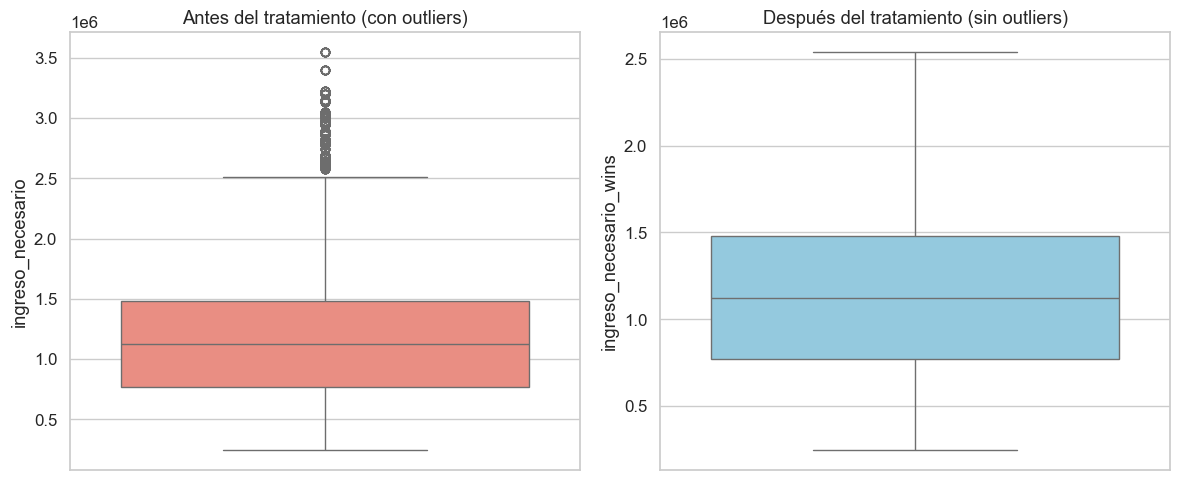

In [30]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=respondieron, y="ingreso_necesario", ax=axes[0], color="salmon")
axes[0].set_title("Antes del tratamiento (con outliers)")

sns.boxplot(data=respondieron, y="ingreso_necesario_wins", ax=axes[1], color="skyblue")
axes[1].set_title("Después del tratamiento (sin outliers)")

plt.tight_layout()
plt.show()


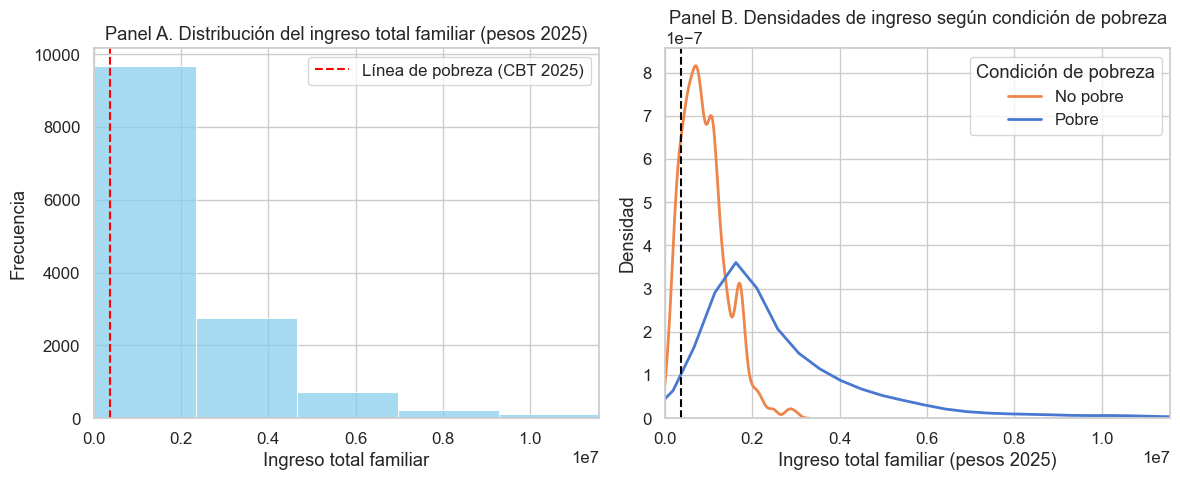

In [31]:
#| label: fig-ingreso-fam
#| fig-cap: Visualización de la distribución de ingresos.
#| echo: false
#| include: true
#| fig-width: 2
#| fig-height: 1.5


# Visualización de distribución de ingresos
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Calcular percentil 99 para mejorar visualización
p99 = respondieron["ingreso_total_familiar"].quantile(0.99)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Panel A
sns.histplot(
    data=respondieron,
    x="ingreso_total_familiar",
    bins=40,
    color="skyblue",
    ax=axes[0]
)
axes[0].axvline(x=CBT_2025, color="red", linestyle="--", label="Línea de pobreza (CBT 2025)")
axes[0].set_xlim(0, p99)
axes[0].set_title("Panel A. Distribución del ingreso total familiar (pesos 2025)")
axes[0].set_xlabel("Ingreso total familiar")
axes[0].set_ylabel("Frecuencia")
axes[0].legend()

# Panel B
sns.kdeplot(
    data=respondieron,
    x="ingreso_total_familiar",
    hue="pobre",
    fill=False,
    common_norm=False,
    linewidth=2,
    ax=axes[1]
)
axes[1].axvline(x=CBT_2025, color="black", linestyle="--", label="Línea de pobreza (CBT 2025)")
axes[1].set_xlim(0, p99)
axes[1].set_title("Panel B. Densidades de ingreso según condición de pobreza")
axes[1].set_xlabel("Ingreso total familiar (pesos 2025)")
axes[1].set_ylabel("Densidad")
axes[1].legend(title="Condición de pobreza", labels=["No pobre", "Pobre"])

plt.tight_layout()
plt.show()

In [32]:
# Panel A: Distribución general de ingresos (binned)
tabla_ingresos = (
    respondieron["ingreso_total_familiar"]
    .value_counts(bins=10, sort=False)
    .rename_axis("Rango de ingreso (pesos 2025)")
    .reset_index(name="Frecuencia")
)
tabla_ingresos["Porcentaje (%)"] = (tabla_ingresos["Frecuencia"] / tabla_ingresos["Frecuencia"].sum() * 100).round(2)

# Panel B: Distribución por condición de pobreza
tabla_ingresos_pobreza = (
    pd.cut(respondieron["ingreso_total_familiar"], bins=10)
    .to_frame(name="Rango de ingreso (pesos 2025)")
    .join(respondieron["pobre"])
    .groupby(["Rango de ingreso (pesos 2025)", "pobre"])
    .size()
    .unstack(fill_value=0)
    .rename(columns={0: "No pobres", 1: "Pobres"})
)
tabla_ingresos_pobreza["Total"] = tabla_ingresos_pobreza.sum(axis=1)
tabla_ingresos_pobreza["% Pobres"] = (tabla_ingresos_pobreza["Pobres"] / tabla_ingresos_pobreza["Total"] * 100).round(2)


/var/folders/c6/f1ghz9qx1bbb4_2pszbddg800000gn/T/ipykernel_13979/2756948387.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Rango de ingreso (pesos 2025)", "pobre"])


In [33]:
print("Tabla A. Distribución general del ingreso total familiar (Panel A)")
display(tabla_ingresos.style.set_caption("Distribución general del ingreso total familiar (Panel A)"))

print("\nTabla B. Distribución del ingreso según condición de pobreza (Panel B)")
display(tabla_ingresos_pobreza.style.set_caption("Distribución del ingreso según condición de pobreza (Panel B)"))

Tabla A. Distribución general del ingreso total familiar (Panel A)


,Rango de ingreso (pesos 2025),Frecuencia,Porcentaje (%)
0,"(-74862.876, 9284794.5]",13394,98.100000
1,"(9284794.5, 18551782.0]",210,1.540000
2,"(18551782.0, 27818769.5]",41,0.300000
3,"(27818769.5, 37085757.0]",0,0.000000
4,"(37085757.0, 46352744.5]",4,0.030000
5,"(46352744.5, 55619732.0]",0,0.000000
6,"(55619732.0, 64886719.5]",0,0.000000
7,"(64886719.5, 74153707.0]",0,0.000000
8,"(74153707.0, 83420694.5]",0,0.000000
9,"(83420694.5, 92687682.0]",4,0.030000



Tabla B. Distribución del ingreso según condición de pobreza (Panel B)


pobre,No pobres,Pobres,Total,% Pobres
Rango de ingreso (pesos 2025),,,,
"(-74862.875, 9284794.5]",9439,3955,13394,29.530000
"(9284794.5, 18551782.0]",210,0,210,0.000000
"(18551782.0, 27818769.5]",41,0,41,0.000000
"(27818769.5, 37085757.0]",0,0,0,nan
"(37085757.0, 46352744.5]",4,0,4,0.000000
"(46352744.5, 55619732.0]",0,0,0,nan
"(55619732.0, 64886719.5]",0,0,0,nan
"(64886719.5, 74153707.0]",0,0,0,nan
"(74153707.0, 83420694.5]",0,0,0,nan


La distribución del ingreso total familiar se concentra fuertemente en los niveles bajos, ya que casi el 98% de los hogares tiene ingresos inferiores a 9,3 millones de pesos de 2025, mostrando una clara asimetría hacia la derecha. En cuanto a la condición de pobreza, se observa que los hogares pobres se concentran principalmente en los tramos de menor ingreso, mientras que en los niveles altos prácticamente no existen, reflejando una marcada desigualdad en la distribución del ingreso.

In [34]:
# Seeleccion de las variables

# Nombres en minúsculas para ambas bases
df_individual_t105.columns = df_individual_t105.columns.str.lower()
df_individual_t125.columns = df_individual_t125.columns.str.lower()

# Variables necesarias según el enunciado del TP
vars_trabajo = ["codusu", "nro_hogar", "componente", "ano4", "ch03", "pp3e_tot", "pp3f_tot"]

# Subconjuntos de interés
indiv_2005 = df_individual_t105[vars_trabajo].copy()
indiv_2025 = df_individual_t125[vars_trabajo].copy()


In [35]:
# Convertir a texto y limpiar espacios
indiv_2005["ch03"] = indiv_2005["ch03"].astype(str).str.strip().str.lower()
indiv_2025["ch03"] = indiv_2025["ch03"].astype(str).str.strip()

# Crear indicador homogéneo de jefe/a del hogar
indiv_2005["es_jefe"] = np.where(indiv_2005["ch03"].str.contains("jefe"), 1, 0)
indiv_2025["es_jefe"] = np.where(indiv_2025["ch03"].isin(["1", "1.0", "1.00"]), 1, 0)

# Unir ambas bases armonizadas
personas = pd.concat([indiv_2005, indiv_2025], ignore_index=True)

In [36]:
# Solo jefes/as del hogar
jefes = personas.loc[personas["es_jefe"] == 1].copy()

# Crear variable total de horas trabajadas
jefes["horastrab"] = jefes[["pp3e_tot", "pp3f_tot"]].sum(axis=1, skipna=True)

# Limpieza: eliminar valores cero o negativos
jefes.loc[jefes["horastrab"] <= 0, "horastrab"] = np.nan

# Verificación
jefes[["ano4", "ch03", "pp3e_tot", "pp3f_tot", "horastrab"]].head(100000)

,ano4,ch03,pp3e_tot,pp3f_tot,horastrab
0,2005.0,jefe,0.0,0.0,NaN
1,2005.0,jefe,20.0,0.0,20.0
4,2005.0,jefe,0.0,0.0,NaN
5,2005.0,jefe,40.0,0.0,40.0
10,2005.0,jefe,25.0,0.0,25.0
...,...,...,...,...,...
92444,2025.0,1,32.0,0.0,32.0
92446,2025.0,1,54.0,27.0,81.0
92447,2025.0,1,NaN,NaN,NaN
92452,2025.0,1,45.0,0.0,45.0


In [37]:
claves = ["codusu", "nro_hogar", "componente", "ano4"]

respondieron = respondieron.merge(
    jefes[claves + ["horastrab"]],
    on=claves,
    how="left"
)

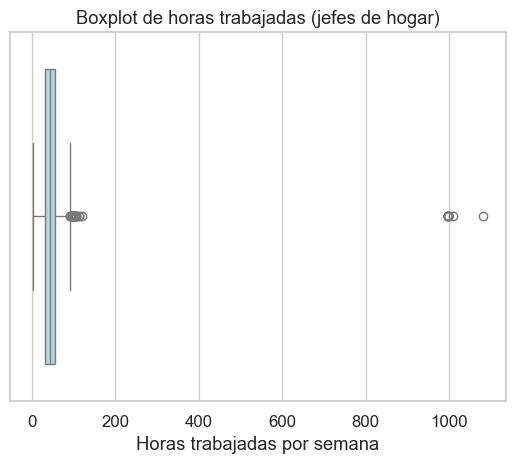

In [38]:
# Visualización de outliers
sns.boxplot(data=respondieron, x="horastrab", color="lightblue")
plt.title("Boxplot de horas trabajadas (jefes de hogar)")
plt.xlabel("Horas trabajadas por semana")
plt.show()


In [39]:
# Calcular los cuartiles y el rango intercuartílico
Q1 = respondieron["horastrab"].quantile(0.25)
Q3 = respondieron["horastrab"].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

# Crear una variable nueva sin outliers (winsorizada)
respondieron["horastrab_wins"] = respondieron["horastrab"].clip(lower=lim_inf, upper=lim_sup)

# Mostrar los límites y la cantidad de observaciones afectadas
print(f"Límite inferior: {lim_inf:.2f}")
print(f"Límite superior: {lim_sup:.2f}")
print(f"Observaciones modificadas: {(respondieron['horastrab'] != respondieron['horastrab_wins']).sum()}")

Límite inferior: -6.00
Límite superior: 90.00
Observaciones modificadas: 10888


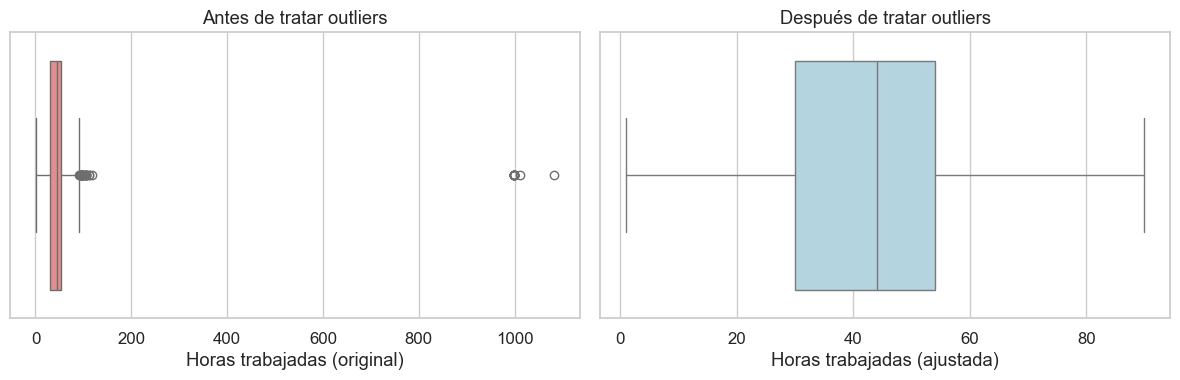

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.boxplot(data=respondieron, x="horastrab", ax=axes[0], color="lightcoral")
axes[0].set_title("Antes de tratar outliers")
axes[0].set_xlabel("Horas trabajadas (original)")

sns.boxplot(data=respondieron, x="horastrab_wins", ax=axes[1], color="lightblue")
axes[1].set_title("Después de tratar outliers")
axes[1].set_xlabel("Horas trabajadas (ajustada)")

plt.tight_layout()
plt.show()

In [41]:
#| label: tab-horastrab
#| tbl-cap: Tabla con estadísticos sobre las horas trabajadas.
#| echo: false
#| include: true

# Calcular los estadísticos principales
promedio = respondieron["horastrab_wins"].mean()
mediana = respondieron["horastrab_wins"].median()
desviacion = respondieron["horastrab_wins"].std()
minimo = respondieron["horastrab_wins"].min()
maximo = respondieron["horastrab_wins"].max()

# Crear tabla resumen
tabla_horas = pd.DataFrame({
    "Estadístico": ["Promedio", "Mediana", "Desviación estándar", "Mínimo", "Máximo"],
    "Valor": [promedio, mediana, desviacion, minimo, maximo]
}).round(2)

# Mostrar resultados
display(tabla_horas)

,Estadístico,Valor
0,Promedio,43.18
1,Mediana,44.00
2,Desviación estándar,18.90
3,Mínimo,1.00
4,Máximo,90.00


In [88]:
# Resumen de la base final por año (2005 y 2025)
obs_totales = respondieron["ano4"].value_counts().sort_index()
na_pobre = respondieron["pobre"].isna().groupby(respondieron["ano4"]).sum()
pobres = respondieron.groupby("ano4")["pobre"].apply(lambda x: (x == 1).sum())
no_pobres = respondieron.groupby("ano4")["pobre"].apply(lambda x: (x == 0).sum())
vars_limpias = respondieron.shape[1]

tabla_region = pd.DataFrame({
    "Año": [2005, 2025],
    "Cantidad de observaciones": obs_totales.values,
    "Observaciones con NA en 'pobre'": na_pobre.values,
    "Cantidad de pobres": pobres.values,
    "Cantidad de no pobres": no_pobres.values,
    "Cantidad de variables limpias/homogeneizadas": [vars_limpias, vars_limpias]
})

total_row = pd.DataFrame({
    "Año": ["Total"],
    "Cantidad de observaciones": [tabla_region["Cantidad de observaciones"].sum()],
    "Observaciones con NA en 'pobre'": [tabla_region["Observaciones con NA en 'pobre'"].sum()],
    "Cantidad de pobres": [tabla_region["Cantidad de pobres"].sum()],
    "Cantidad de no pobres": [tabla_region["Cantidad de no pobres"].sum()],
    "Cantidad de variables limpias/homogeneizadas": [vars_limpias]
})

tabla_region = pd.concat([tabla_region, total_row], ignore_index=True)

In [89]:
#| label: tab-base-final
#| tbl-cap: Tabla 1. Resumen de la base final para la región seleccionada.
#| echo: false
#| include: true

tabla_region = tabla_region.transpose()
tabla_region.columns = tabla_region.iloc[0,:]
tabla_region = tabla_region.iloc[1:]
tabla_region

Año,2005,2025,Total
Cantidad de observaciones,9371,4282,13653
Observaciones con NA en 'pobre',0,0,0
Cantidad de pobres,2493,1462,3955
Cantidad de no pobres,6878,2820,9698
Cantidad de variables limpias/homogeneizadas,34,34,34


# Métodos no supervisados

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [45]:
vars_2 = ['ch06', 'edad2', 'educ','ingreso_total_familiar','horastrab', 'ix_tot']
X = respondieron[vars_2].copy()

X.dropna(inplace=True)

In [93]:
X = X.rename(columns={'ingreso_total_familiar': 'itf'})

En la @fig-heatmap se puede ver la correlacion de las variables edad, edad al cuadrado, años de educación, ingreso_total_familiar, el número de miembros en el hogar y horas trabajadas. La única variable que tiene una alta correlación es edad con edad al cuadrado, lo cual era esperable. Con estas variables se implementarán métodos no supervisados para intentar dividir nuestra muestra entre pobres y no pobres. Cabe aclarar que previo a correr estos algoritmos se estandarizaron las variables dado que son sensibles a las escalas en las que están los datos.

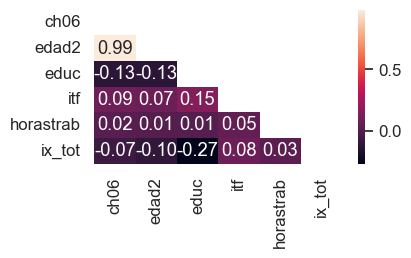

In [94]:
#| label: fig-heatmap
#| fig-cap: Heatmap con correlaciones de las variables incluidas.
#| echo: false
#| include: true
#| fig-width: 2
#| fig-height: 1.5

corr_X = X.corr()
mask = np.triu(np.ones_like(corr_X, dtype=bool))
fig, ax = plt.subplots(figsize=(4,2))
sns.heatmap(corr_X, annot=True, mask=mask, fmt=".2f")
ax.grid(False)

In [95]:
scaler = StandardScaler(with_std=True, with_mean=True) 
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## PCA

In [96]:
pca = PCA()
scores = pca.fit_transform(X_scaled)

En la @fig-pca-scores-pondera vemos los scores en el panel A y los ponderadores en el B. En éste último se ve que la edad y la edad al cuadrado tienen una ponderación más alta en el primer componente, mientras que la educación y la cantidad de personas en el hogar dominan en el segundo.

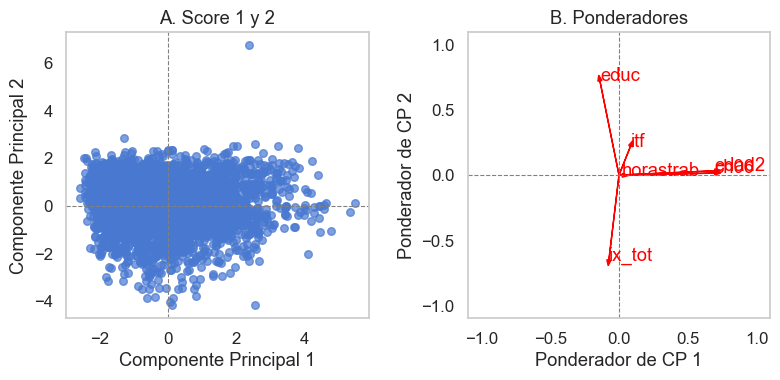

In [99]:
#| label: fig-pca-scores-pondera
#| fig-cap: Visualización los scores y ponderadores.
#| echo: false
#| include: true
#| fig-width: 2
#| fig-height: 1.5

i, j = 0, 1
fig, (ax_scores, ax_ponderadores) = plt.subplots(1, 2, figsize=(8, 4)) 

ax_scores.scatter(scores[:,0], scores[:,1], s=30, alpha=0.7) 
ax_scores.set_xlabel(f'Componente Principal {i+1}')
ax_scores.set_ylabel(f'Componente Principal {j+1}')
ax_scores.set_title('A. Score 1 y 2')


ax_scores.axhline(0, color='gray', linestyle='--', linewidth=0.8) 
ax_scores.axvline(0, color='gray', linestyle='--', linewidth=0.8) 
ax_scores.grid(False)

ax_ponderadores.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax_ponderadores.axvline(0, color='gray', linestyle='--', linewidth=0.8)


for k in range(pca.components_.shape[1]): 
    ax_ponderadores.arrow(0, 0, pca.components_[i,k], pca.components_[j,k], color ='red', head_width=0.03) 
    ax_ponderadores.text(pca.components_[i,k], pca.components_[j,k], X_scaled.columns[k], color ='red') 

ax_ponderadores.set_xlabel(f'Ponderador de CP {i+1}')
ax_ponderadores.set_ylabel(f'Ponderador de CP {j+1}')
ax_ponderadores.set_title('B. Ponderadores')
ax_ponderadores.set_xlim(-1.1, 1.1)
ax_ponderadores.set_ylim(-1.1, 1.1)
ax_ponderadores.grid(False)

plt.tight_layout()
plt.show()

En la @fig-pca-prop-var se puede ver como el primer y segundo componente capturan el 55% de la variabilidad y dado que el tercero y cuarto capturan 0.18 y 0.16, respectivamente, considerando los 4 tendriamos un 89%. El quinto componente aumenta la varaibilidad explicada pero menos, siendo solo un 10%.

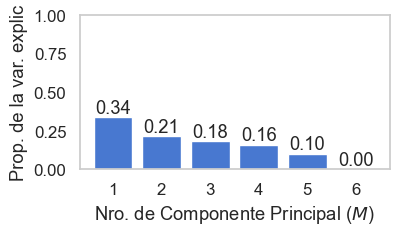

In [98]:
#| label: fig-pca-prop-var
#| fig-cap: Proporción de la variabilidad explicada por cada componente.
#| echo: false
#| include: true

fig, ax = plt.subplots(figsize=(4, 2))
ticks = np.arange(pca.n_components_)+1 
bars = ax.bar(ticks, pca.explained_variance_ratio_)
ax.set_xlabel('Nro. de Componente Principal ($M$)');
ax.set_ylabel('Prop. de la var. explic')
ax.set_ylim([0,1])
ax.set_xticks(ticks)
ax.grid(False)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0,  
            height,                               
            f'{height:.2f}',                      
            ha='center',                          
            va='bottom')

## Cluster

En la @fig-cluster se pueden ver los resultados del algoritmo de cluster k-medias donde el mismo logra identificar pobres y no pobres con k=2.

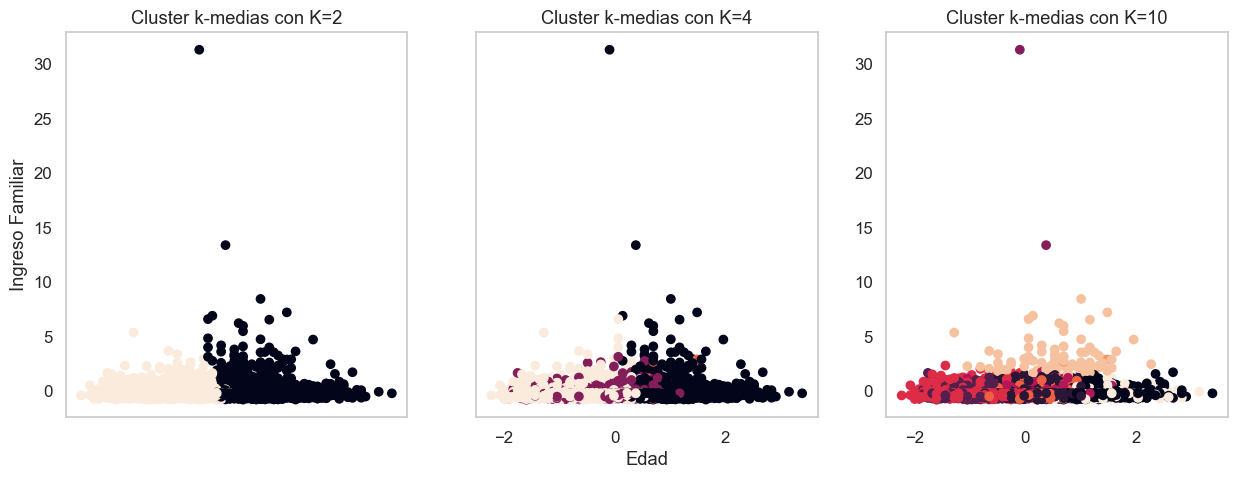

In [ ]:
#| label: fig-cluster
#| fig-cap: Cluster con distintos k.
#| echo: false
#| include: true
#| fig-width: 2
#| fig-height: 1.5

k_list = [2, 4, 10]

resultados = pd.DataFrame()

fig, ax = plt.subplots(1, 3, figsize=(15,5))
for k_idx, k_val in enumerate(k_list):
    kmeans = KMeans(n_clusters=k_val, random_state=42, init='random', n_init=10).fit(X_scaled)

    # Gráfico de las observaciones con las etiquetas correspondientes a cada cluster

    ax[k_idx].scatter(X_scaled['ch06'], X_scaled['ingreso_total_familiar'], c=kmeans.labels_) 
    ax[k_idx].set_title(f"Cluster k-medias con K={k_val}")
    
    ax[k_idx].grid(False)
    
    if k_idx == 0:
        ax[k_idx].set_ylabel("Ingreso Familiar")
        ax[k_idx].set_xlabel("")
        ax[k_idx].set_xticklabels([])
    elif k_idx == 1:
        ax[k_idx].set_xlabel("Edad")
        ax[k_idx].set_ylabel("")
        ax[k_idx].set_yticklabels([])

In [52]:
k_range = range(1,11)

intertia_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, init='random', n_init=10).fit(X_scaled)
    intertia_values.append(kmeans.inertia_)

Como se observa en la Figura 1, el método del codo (o elbow) no arroja un resultado concluyente, ya que no se aprecia una reducción abrupta de la inertia para ningún número de clústeres. Esto contrasta con la expectativa de encontrar un punto de inflexión en k=2, que correspondería a los dos grupos teóricos de interés (pobres y no pobres).

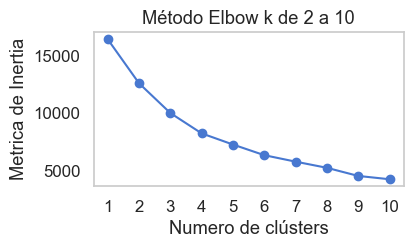

In [62]:
#| label: fig-elbow
#| fig-cap: Elbow plot para k de 2 a 10.
#| echo: false
#| include: true
#| fig-width: 0.5
#| fig-height: 0.25
#| out-width: "60%"


fig, ax = plt.subplots(figsize=(4,2))
plt.plot(k_range, intertia_values, marker='o')
plt.xlabel('Numero de clústers')
plt.ylabel('Metrica de Inertia')
plt.title('Método Elbow k de 2 a 10')
plt.xticks(k_range)
plt.grid(False)

Finalmente, en la @fig-dendograma se presenta un dendrograma con las variables utilizadas. Este permite visualizar dos particiones principales, que podrían interpretarse como pobres y no pobres. El dendrograma es un diagrama que muestra cómo se agruparon los datos en función de su distancia, de modo que aquellos que aparecen juntos son más parecidos entre sí.

Text(0, 0.5, 'Disimilitud')

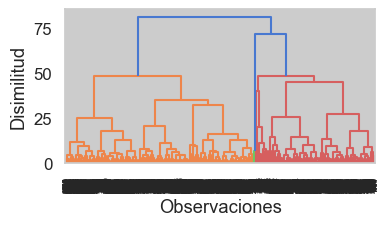

In [ ]:
#| label: fig-dendograma
#| fig-cap: Dendograma.
#| echo: false
#| include: true

linkage_data = linkage(X_scaled, metric='euclidean', method='ward') # cambio a ward porque sino no funciona

fig, ax = plt.subplots(figsize=(4,2))
dendrogram(linkage_data)
ax.set_xlabel("Observaciones")
ax.set_ylabel("Disimilitud")